In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telegram = pd.read_csv('tg_results.csv')

In [3]:
telegram.head()

,state,dimension,count,percentage,total_posts
0,Guanajuato,INCOME,40,18.264840,219
1,Guanajuato,ACCESS TO HEALTH SERVICES,54,24.657534,219
2,Guanajuato,EDUCATIONAL_LAG,15,6.849315,219
3,Guanajuato,ACCESS TO SOCIAL SECURITY,60,27.397260,219
4,Guanajuato,HOUSING,12,5.479452,219


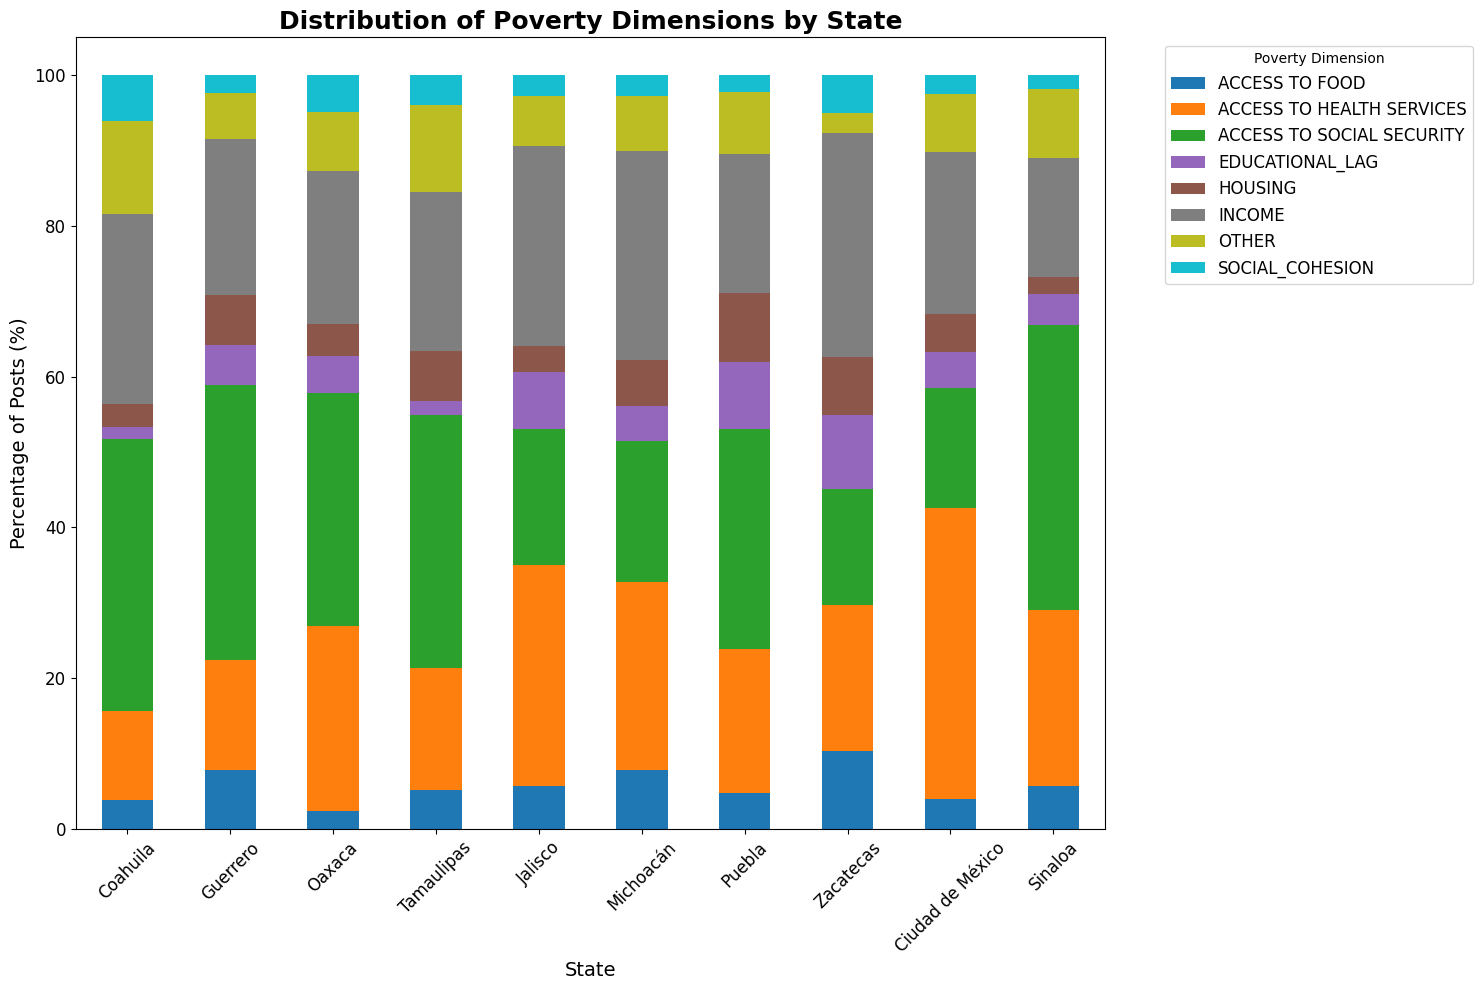

In [ ]:
pivot_df = telegram.pivot(index='state', columns='dimension', values='percentage')
state_totals = telegram.groupby('state')['total_posts'].first().sort_values(ascending=False)
top_states = state_totals.head(10).index
pivot_df_top = pivot_df.loc[top_states]
fig, ax = plt.subplots(figsize=(15, 10))  
pivot_df_top.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')
plt.title('Distribution of Poverty Dimensions by State', 
          fontsize=18, fontweight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Percentage of Posts (%)', fontsize=14)
plt.legend(title='Poverty Dimension', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('stacked_bar_chart.png', dpi=300)
plt.show()

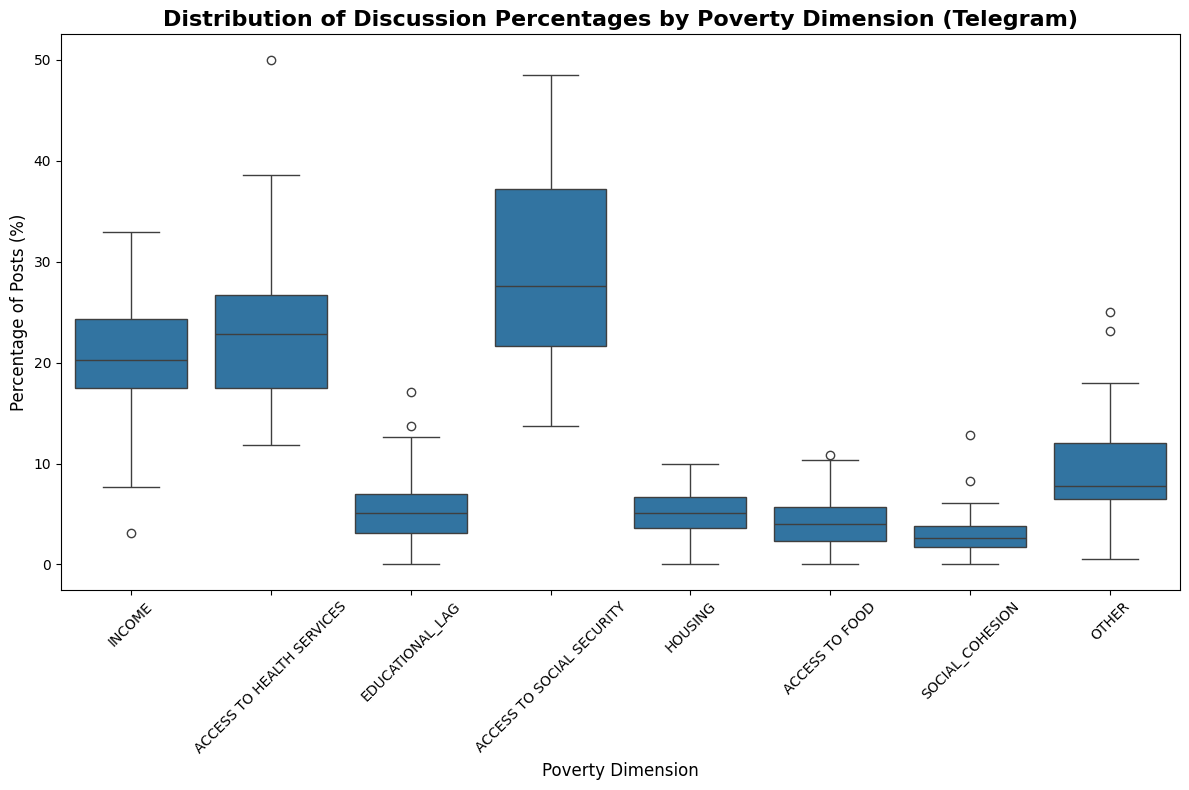

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=telegram, x='dimension', y='percentage')
plt.title('Distribution of Discussion Percentages by Poverty Dimension (Telegram)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Poverty Dimension', fontsize=12)
plt.ylabel('Percentage of Posts (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('box_plot.png', dpi=300)
plt.show()

In [36]:
df_val = pd.read_csv('official_data_2022.csv')

In [37]:
df_val.head()

,year,state,educational lag,access to health services,access to social security,housing1,housing2,access to food,income,ext_pov
0,2022,Aguascalientes,16.5,26.2,34.7,4.7,2.5,15.6,33.0,6.1
1,2022,Baja California,15.5,28.4,34.7,6.1,4.1,10.0,18.8,2.8
2,2022,Baja California Sur,14.2,17.3,29.9,8.6,9.9,14.5,17.9,2.8
3,2022,Campeche,20.3,34.6,54.7,14.9,34.9,22.0,51.0,15.9
4,2022,Coahuila de Zaragoza,13.5,19.7,24.4,3.4,3.4,13.2,28.8,5.9


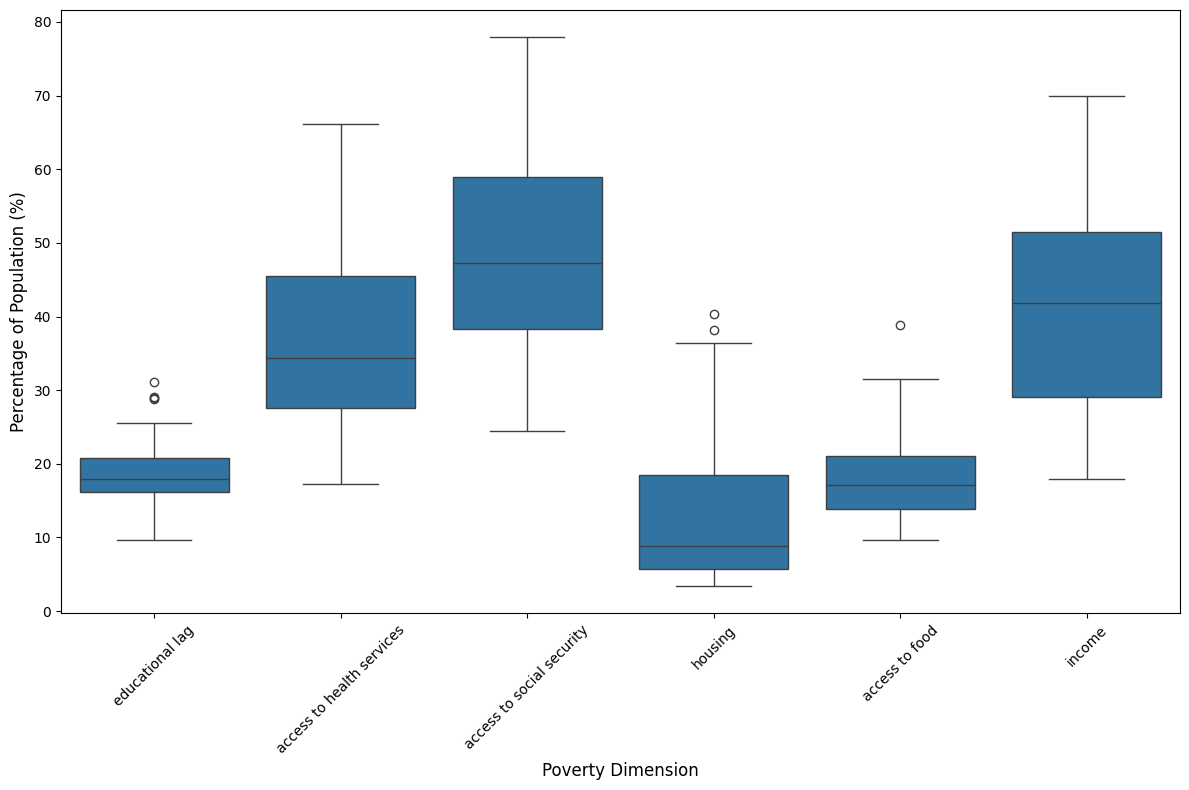

In [39]:
official_combined = df_val.copy()
official_combined['housing'] = (official_combined['housing1'] + official_combined['housing2']) / 2
poverty_dimensions_combined = ['educational lag', 'access to health services', 'access to social security', 
                      'housing', 'access to food', 'income']
official_combined_long = pd.melt(official_combined, 
                                id_vars=['year', 'state'], 
                                value_vars=poverty_dimensions_combined,
                                var_name='dimension', 
                                value_name='percentage')
plt.figure(figsize=(12, 8))
sns.boxplot(data=official_combined_long, x='dimension', y='percentage')
plt.xlabel('Poverty Dimension', fontsize=12)
plt.ylabel('Percentage of Population (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('box_plot_official.png', dpi=300)
plt.show()

In [ ]:
import pandas as pd
import os
import glob

csv_path = "yt_pipelines/YT_FINAL_DATA/*.csv"

csv_files = glob.glob(csv_path)

dataframes = []
for file in csv_files:
    df = pd.read_csv(file)
    df['source_file'] = os.path.basename(file)
    dataframes.append(df)

youtube_data = pd.concat(dataframes, ignore_index=True)

Caricati 32 file CSV
Dimensioni finali: (224, 7)
Colonne: ['state', 'dimension', 'avg_sentiment', 'mentions_count', 'videos_analyzed', 'comments_analyzed', 'source_file']


In [41]:
youtube_data.head()

,state,dimension,avg_sentiment,mentions_count,videos_analyzed,comments_analyzed,source_file
0,Morelos,Income,-0.520091,7665,300,19707,morelos.csv
1,Morelos,Access To Health Services,-0.492330,1695,300,19707,morelos.csv
2,Morelos,Educational Lag,-0.247645,3079,300,19707,morelos.csv
3,Morelos,Access To Social Security,-0.409978,461,300,19707,morelos.csv
4,Morelos,Housing,-0.539501,962,300,19707,morelos.csv


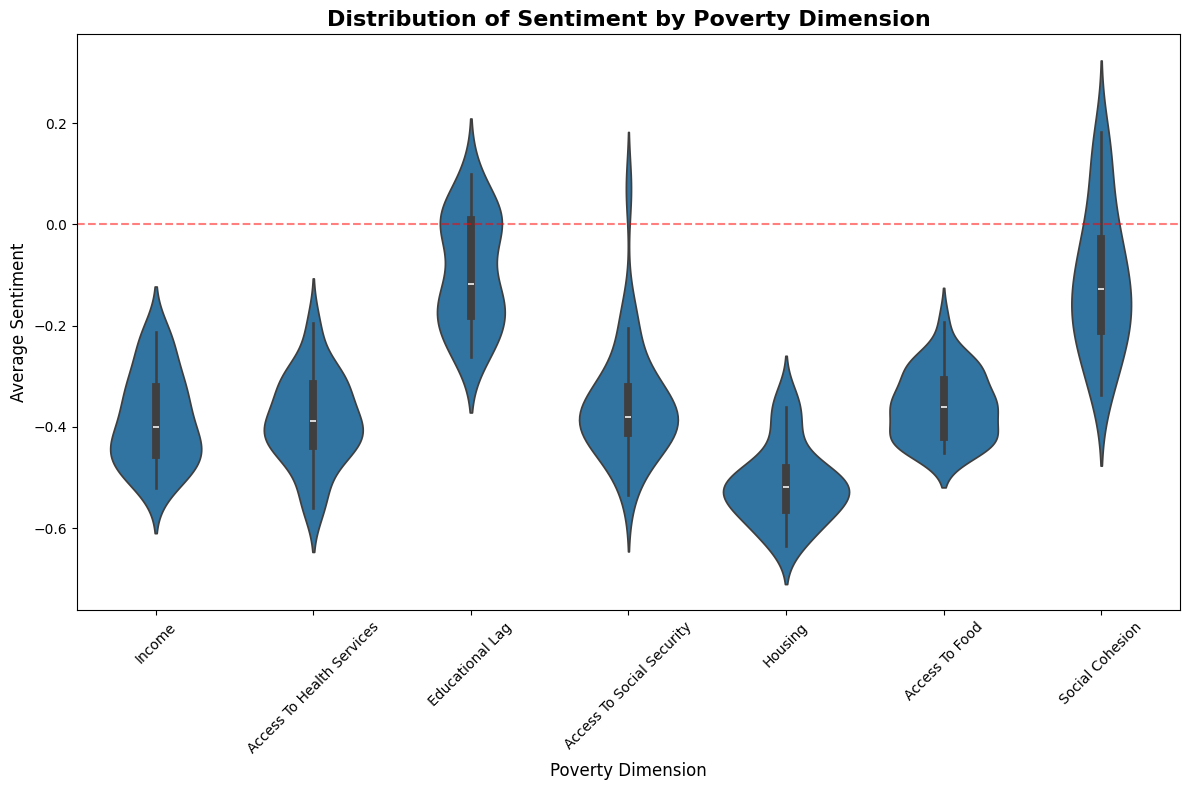

In [48]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=youtube_data, x='dimension', y='avg_sentiment')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.title('Distribution of Sentiment by Poverty Dimension', 
          fontsize=16, fontweight='bold')
plt.xlabel('Poverty Dimension', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('violin_plot.png', dpi=300)
plt.show()

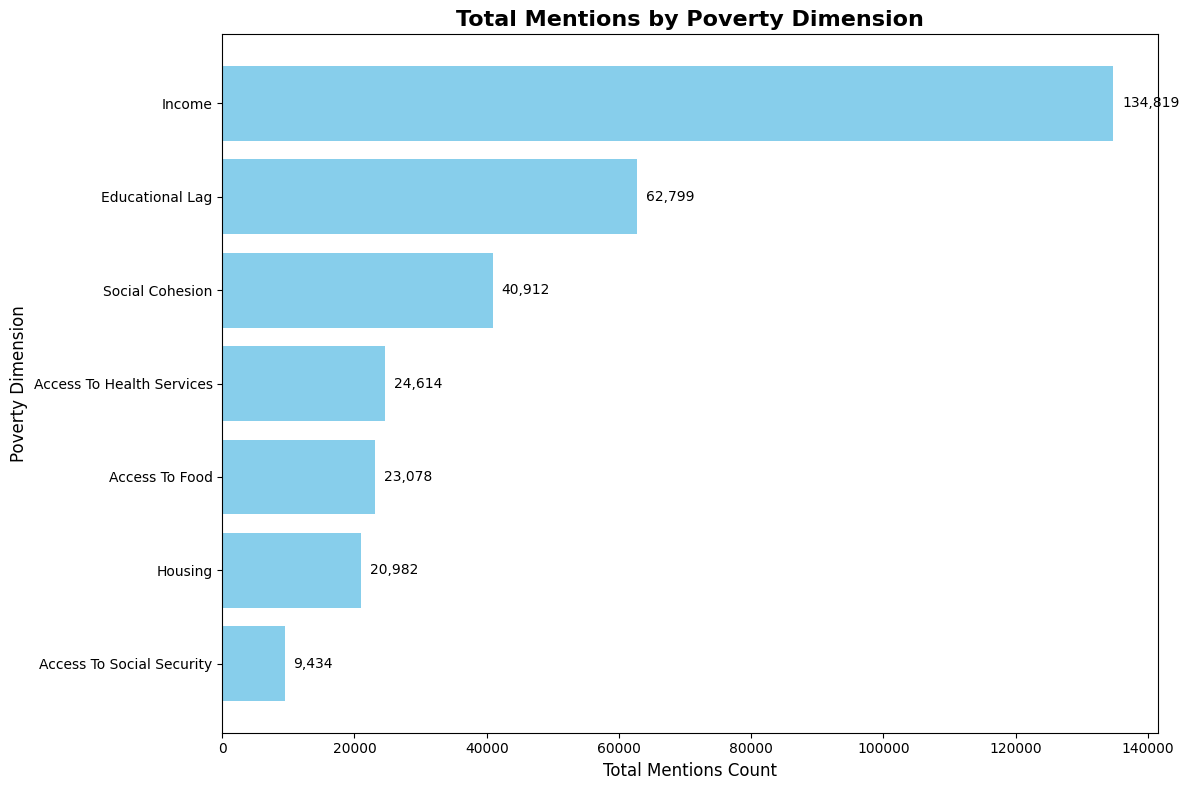

In [ ]:
plt.figure(figsize=(12, 8))
mentions_by_dimension = youtube_data.groupby('dimension')['mentions_count'].sum().sort_values(ascending=True)
bars = plt.barh(mentions_by_dimension.index, mentions_by_dimension.values, color='skyblue')
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(mentions_by_dimension) * 0.01, 
             bar.get_y() + bar.get_height()/2, 
             f'{int(width):,}', va='center', fontsize=10)

plt.title('Total Mentions by Poverty Dimension', fontsize=16, fontweight='bold')
plt.xlabel('Total Mentions Count', fontsize=12)
plt.ylabel('Poverty Dimension', fontsize=12)
plt.tight_layout()
plt.savefig('mentions_count_comparison.png', dpi=300)   
plt.show()

In [16]:
df_val = pd.read_csv('official_data_2022.csv', delimiter=";")

In [17]:
df_val.head()

,year,state,education,health,social,housing1,housing2,food,poverty,ext_pov
0,2022.0,Aguascalientes,16.5,26.2,34.7,4.7,2.5,15.6,33.0,6.1
1,2022.0,Baja California,15.5,28.4,34.7,6.1,4.1,10.0,18.8,2.8
2,2022.0,Baja California Sur,14.2,17.3,29.9,8.6,9.9,14.5,17.9,2.8
3,2022.0,Campeche,20.3,34.6,54.7,14.9,34.9,22.0,51.0,15.9
4,2022.0,Coahuila de Zaragoza,13.5,19.7,24.4,3.4,3.4,13.2,28.8,5.9


In [18]:
df_val['education'].mean()

19.190625

In [19]:
df_val['health'].mean()

36.5

In [20]:
df_val['social'].mean()

48.809375

In [21]:
df_val['housing1'].mean()

9.375

In [22]:
df_val['housing2'].mean()

18.153125000000003

In [23]:
df_val['food'].mean()

18.1875

In [24]:
df_val['poverty'].mean()

41.443749999999994